In [131]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from keras.optimizers import SGD
import matplotlib.pyplot as plt
from keras import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import *
# fix random seed for reproducibility
np.random.seed(7)
var_w=lambda shape: initializers.RandomUniform(-0.5,0.5)

In [132]:
# load pima indians dataset
dataset = pd.read_csv("/Users/malush/Documents/projet AFD 2018/AFD/train_cap2018.csv", sep=",")
# split into input (X) and output (Y) variables
scaler = StandardScaler()
X=dataset.iloc[:,1:59].astype(float)
Y=dataset.iloc[:,59]


X, X_test, Y, Y_test = train_test_split(X, Y)
w = np.isnan(X)
X[w] = 0#X.mean() à changer
w2= np.isnan(X_test)
X_test[w2] = 0

#Normalisation 

scaler.fit(X)
StandardScaler(copy=True, with_mean=True, with_std=True)

# Now apply the transformations to the data:
X = scaler.transform(X)
X_test = scaler.transform(X_test)




In [133]:
Y.shape

(20482,)

In [134]:
#Pour encoder Y
encoder = LabelEncoder()
encoder.fit(Y)
#converti le Y de chaine de caractères à numérique
Y_numerique = encoder.transform(Y)

print(Y_numerique)
# convert integers to dummy variables (i.e. one hot encoded)
y_encode_binaire = np_utils.to_categorical(Y_numerique)#6

#encoder Y_test
#Pour encoder Y
encoder = LabelEncoder()
encoder.fit(Y_test)
#converti le Y de chaine de caractères à numérique
Y_test_numerique = encoder.transform(Y_test)

print(Y_test_numerique)
# convert integers to dummy variables (i.e. one hot encoded)
y_test_encode_binaire = np_utils.to_categorical(Y_test_numerique)#6

print(y_test_encode_binaire)

[2 2 0 ... 1 0 0]
[0 0 0 ... 0 4 0]
[[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0.]]


In [135]:
print(y_encode_binaire)

[[0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 ...
 [0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]


In [136]:
X #exemple X


array([[-1.45240564, -0.5225527 , -0.50074042, ...,  0.85178807,
         0.41758741, -0.82643141],
       [-0.33318022,  2.9795954 ,  3.32352667, ..., -1.21685247,
        -0.17523392, -0.60309252],
       [-0.89279293, -1.00229902, -1.0907702 , ...,  0.95029477,
        -0.09429245,  0.57178261],
       ...,
       [ 0.22643249, -0.40261612, -0.25489468, ..., -1.70938594,
        -1.08057928,  2.26100449],
       [-0.05337386, -0.11476833, -0.09099752, ..., -0.13327885,
        -0.29065047,  0.39901299],
       [-0.05337386, -0.78641317, -0.69195378, ..., -1.31535917,
        -1.11505435,  1.37672014]])

In [137]:

# create model
model = Sequential()
model.add(Dense(100, input_dim=58,kernel_initializer='normal', activation='relu'))#

model.add(Dense(500, activation='relu'))
model.add(Dense(6,kernel_initializer='normal', activation='softmax'))# a revoir la fct


In [140]:

# Compile model
sgd = SGD(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])#adamax

In [141]:
# Fit the model
model.fit(X, y_encode_binaire, epochs=100, batch_size=32)

Epoch 1/100
20482/20482 [==============================] - 3s 127us/step - loss: 0.6127 - acc: 0.7672
Epoch 2/100
20482/20482 [==============================] - 2s 98us/step - loss: 0.5546 - acc: 0.7870
Epoch 3/100
20482/20482 [==============================] - 2s 96us/step - loss: 0.5257 - acc: 0.8003
Epoch 4/100
20482/20482 [==============================] - 2s 105us/step - loss: 0.5059 - acc: 0.8070
Epoch 5/100
20482/20482 [==============================] - 2s 93us/step - loss: 0.4867 - acc: 0.8130
Epoch 6/100
20482/20482 [==============================] - 2s 98us/step - loss: 0.4730 - acc: 0.8189
Epoch 7/100
20482/20482 [==============================] - 2s 104us/step - loss: 0.4628 - acc: 0.8224
Epoch 8/100
20482/20482 [==============================] - 2s 98us/step - loss: 0.4482 - acc: 0.8298
Epoch 9/100
20482/20482 [==============================] - 2s 95us/step - loss: 0.4407 - acc: 0.8314
Epoch 10/100
20482/20482 [==============================] - 2s 87us/step - loss: 0.4310 

20482/20482 [==============================] - 2s 89us/step - loss: 0.0375 - acc: 0.9880
Epoch 82/100
20482/20482 [==============================] - 2s 91us/step - loss: 0.0602 - acc: 0.9804
Epoch 83/100
20482/20482 [==============================] - 2s 98us/step - loss: 0.0580 - acc: 0.9815
Epoch 84/100
20482/20482 [==============================] - 2s 110us/step - loss: 0.0642 - acc: 0.9782
Epoch 85/100
20482/20482 [==============================] - 2s 94us/step - loss: 0.0419 - acc: 0.9859
Epoch 86/100
20482/20482 [==============================] - 2s 116us/step - loss: 0.0736 - acc: 0.9761
Epoch 87/100
20482/20482 [==============================] - 2s 88us/step - loss: 0.0400 - acc: 0.9871
Epoch 88/100
20482/20482 [==============================] - 2s 90us/step - loss: 0.0477 - acc: 0.9831
Epoch 89/100
20482/20482 [==============================] - 2s 111us/step - loss: 0.0525 - acc: 0.9813
Epoch 90/100
20482/20482 [==============================] - 2s 88us/step - loss: 0.0778 - ac

In [ ]:
scores = model.evaluate(X, y_encode_binaire)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
#print(scores)

In [ ]:
predictions = model.predict_classes(X_test)
classes = encoder.inverse_transform(predictions)


import seaborn as sns
import matplotlib.pyplot as plt

print(classes.shape)
sns.countplot(classes,label="Count")
plt.show()


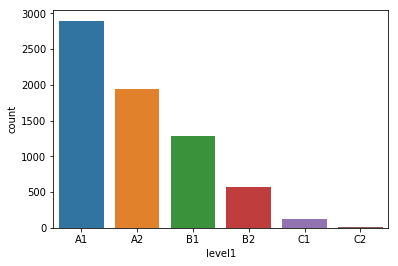

(6828,)

In [58]:
sns.countplot(Y_test,label="Count")
plt.show()
Y_test.shape

In [5]:
#KNN
knn = KNeighborsClassifier()
knn.fit(X, Y_numerique)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X, Y_numerique)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, Y_test_numerique)))

Accuracy of K-NN classifier on training set: 0.82
Accuracy of K-NN classifier on test set: 0.75


In [60]:
svm = SVC()
svm.fit(X,Y_numerique)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X, Y_numerique)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, Y_test_numerique)))
    

Accuracy of SVM classifier on training set: 0.80
Accuracy of SVM classifier on test set: 0.79


In [62]:
#arbre de décision
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X,Y_numerique)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X,Y_numerique)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test,Y_test_numerique)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.72


In [12]:
from sklearn.cluster import KMeans
'''
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

'''
kmeans = KMeans(n_clusters=6,max_iter=400,init = 'k-means++',tol=0.00001,n_init=20,random_state=50)
y_kmeans = kmeans.fit_predict(X)


In [ ]:
idk=np.argsort(kmeans.labels_)

print(pd.DataFrame(X))

In [13]:
randomized_pca = RandomizedPCA(n_components=2)
reduced_data_rpca = randomized_pca.fit_transform(X)
pca = PCA(n_components=2)
reduced_data_pca = pca.fit_transform(X)


C:\Users\PICOS\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


In [53]:
print(kmeans.labels_)

[4 4 3 ..., 1 1 1]


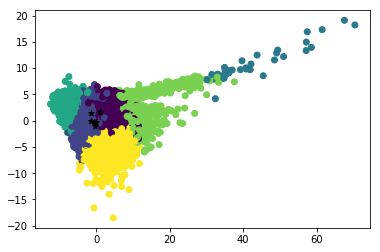

In [15]:
plt.scatter(reduced_data_pca[:, 0], reduced_data_pca[:, 1], c=y_kmeans, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1],marker='*', c='black')
#centers = kmeans.cluster_centers_
#plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.show()

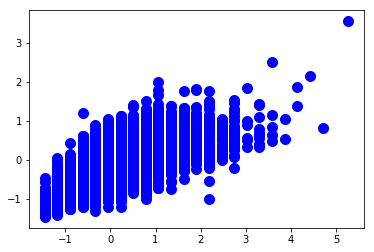

"\nplt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'C2')\nplt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'C3')\nplt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'C1')\nplt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'C2')\nplt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'C3')\n"

In [65]:
#plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'C1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'C2')
plt.show()
'''
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'C2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'C3')
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'C1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'C2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'C3')
'''
